# Used Cars Price Predection App

## Cleaning Pars

#### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#### Reading data


In [2]:
df_dirty=pd.read_csv(r"C:\Users\HP\Downloads\train-data.csv")


In [3]:
df_dirty.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df_dirty.shape

(6019, 14)

# Data Cleaning

In [5]:
df_dirty.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

#### Remove Unnecessary Features

In [6]:
df_dirty.drop(['Unnamed: 0','New_Price'], axis=1,inplace=True)

In [7]:
df_dirty.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.0,53000.00,73000.00,6500000.0
Seats,5977.0,5.278735,0.808840,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [8]:
df_dirty.describe(include='object').T

,count,unique,top,freq
Name,6019,1876,Mahindra XUV500 W8 2WD,49
Location,6019,11,Mumbai,790
Fuel_Type,6019,5,Diesel,3205
Transmission,6019,2,Manual,4299
Owner_Type,6019,4,First,4929
Mileage,6017,442,18.9 kmpl,172
Engine,5983,146,1197 CC,606
Power,5983,372,74 bhp,235


#### Handling Formating Issues 

In [9]:
## create new column model from brand name (Feature Engineering)
df_dirty['Model']=df_dirty['Name'].apply(lambda x:x.split()[1])

In [10]:
df_dirty['Model'].nunique()

212

In [11]:
## name

df_dirty['Name']=df_dirty['Name'].apply(lambda x:x.split()[0])

In [12]:
df_dirty['Name'].nunique()

31

In [13]:
df_dirty.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Wagon


In [14]:
df_dirty['Age']=2020-df_dirty['Year']

In [15]:
df_dirty['Mileage'].value_counts()

Mileage
18.9 kmpl      172
17.0 kmpl      172
18.6 kmpl      119
20.36 kmpl      88
21.1 kmpl       86
              ... 
23.57 kmpl       1
14.53 km/kg      1
12.85 kmpl       1
18.69 kmpl       1
17.24 kmpl       1
Name: count, Length: 442, dtype: int64

In [16]:
def milage_convert(x):
    if type(x)==str:
       if x.split()[-1]=='km/kg':
          
          return float(x.split()[0])*1.40
       elif x.split()[-1]=='kmpl':
          return float(x.split()[0])
    else:
        return np.nan
df_dirty['Mileage']=df_dirty['Mileage'].apply(milage_convert)
    


In [17]:
df_dirty.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model,Age
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,37.24,998 CC,58.16 bhp,5.0,1.75,Wagon,10


In [18]:
df_dirty['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [19]:
def engine(x):
    if type(x)==str:
        
        return float(x.split()[0])
    else:
        return np.nan
df_dirty['Engine']=df_dirty['Engine'].apply(engine)

In [20]:
df_dirty.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model,Age
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16 bhp,5.0,1.75,Wagon,10


In [21]:
df_dirty['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

In [22]:
def Power(x):
    if type(x)==str:
        
        return x.split()[0]
        
    else:
        return np.nan
df_dirty['Power']=df_dirty['Power'].apply(Power)

In [23]:
df_dirty.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model,Age
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,Wagon,10


In [24]:
df_dirty.Engine.value_counts().sum()

np.int64(5983)

#### Handling Data Types Issues

In [25]:
df_dirty.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
Price                float64
Model                 object
Age                    int64
dtype: object

In [26]:
df_dirty['Power']=pd.to_numeric(df_dirty['Power'],errors='coerce')

#### Handling Duplicates

In [27]:
df_dirty.duplicated().sum()

np.int64(2)

In [28]:
df_dirty.drop_duplicates(inplace=True)

#### Handling Missing Values 

In [29]:
df_dirty.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Model                  0
Age                    0
dtype: int64

In [30]:
df_dirty.fillna(df_dirty.median(numeric_only=True), inplace=True)


In [31]:
for i in df_dirty.select_dtypes("object"):
    df_dirty[i]=df_dirty[i].fillna(df_dirty[i].mode()[0])

In [32]:
df_dirty.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Model                0
Age                  0
dtype: int64

In [33]:
df_dirty['Seats']

0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
       ... 
6014    5.0
6015    5.0
6016    8.0
6017    5.0
6018    5.0
Name: Seats, Length: 6017, dtype: float64

#### Univariate Analysis

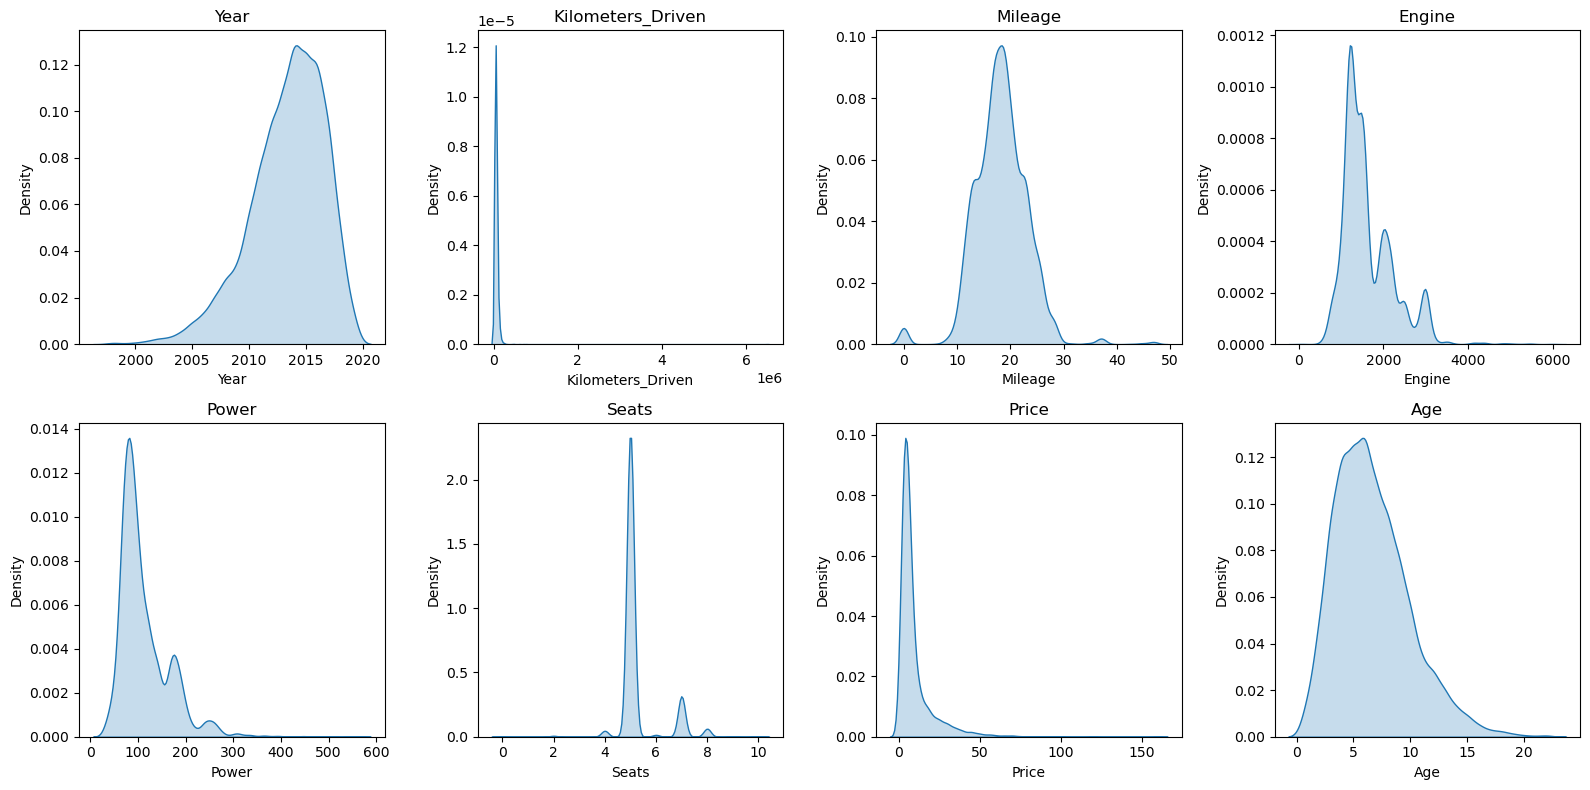

In [34]:
numerical_data = ["Year", "Kilometers_Driven", "Mileage", "Engine", 
                  "Power", "Seats", "Price", "Age"]

# Create subplots: 2 rows, 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten() 

# Plot each feature
for i, column in enumerate(numerical_data):
    sns.kdeplot(data=df_dirty[column], fill=True, ax=axes[i])
    axes[i].set_title(column, fontsize=12)
    
    axes[i].set_ylabel("Density")

plt.tight_layout()
plt.show()

#### Potintail Insights:
##### 

In [35]:
df_dirty.select_dtypes("object")

,Name,Location,Fuel_Type,Transmission,Owner_Type,Model
0,Maruti,Mumbai,CNG,Manual,First,Wagon
1,Hyundai,Pune,Diesel,Manual,First,Creta
2,Honda,Chennai,Petrol,Manual,First,Jazz
3,Maruti,Chennai,Diesel,Manual,First,Ertiga
4,Audi,Coimbatore,Diesel,Automatic,Second,A4
...,...,...,...,...,...,...
6014,Maruti,Delhi,Diesel,Manual,First,Swift
6015,Hyundai,Jaipur,Diesel,Manual,First,Xcent
6016,Mahindra,Jaipur,Diesel,Manual,Second,Xylo
6017,Maruti,Kolkata,Petrol,Manual,First,Wagon


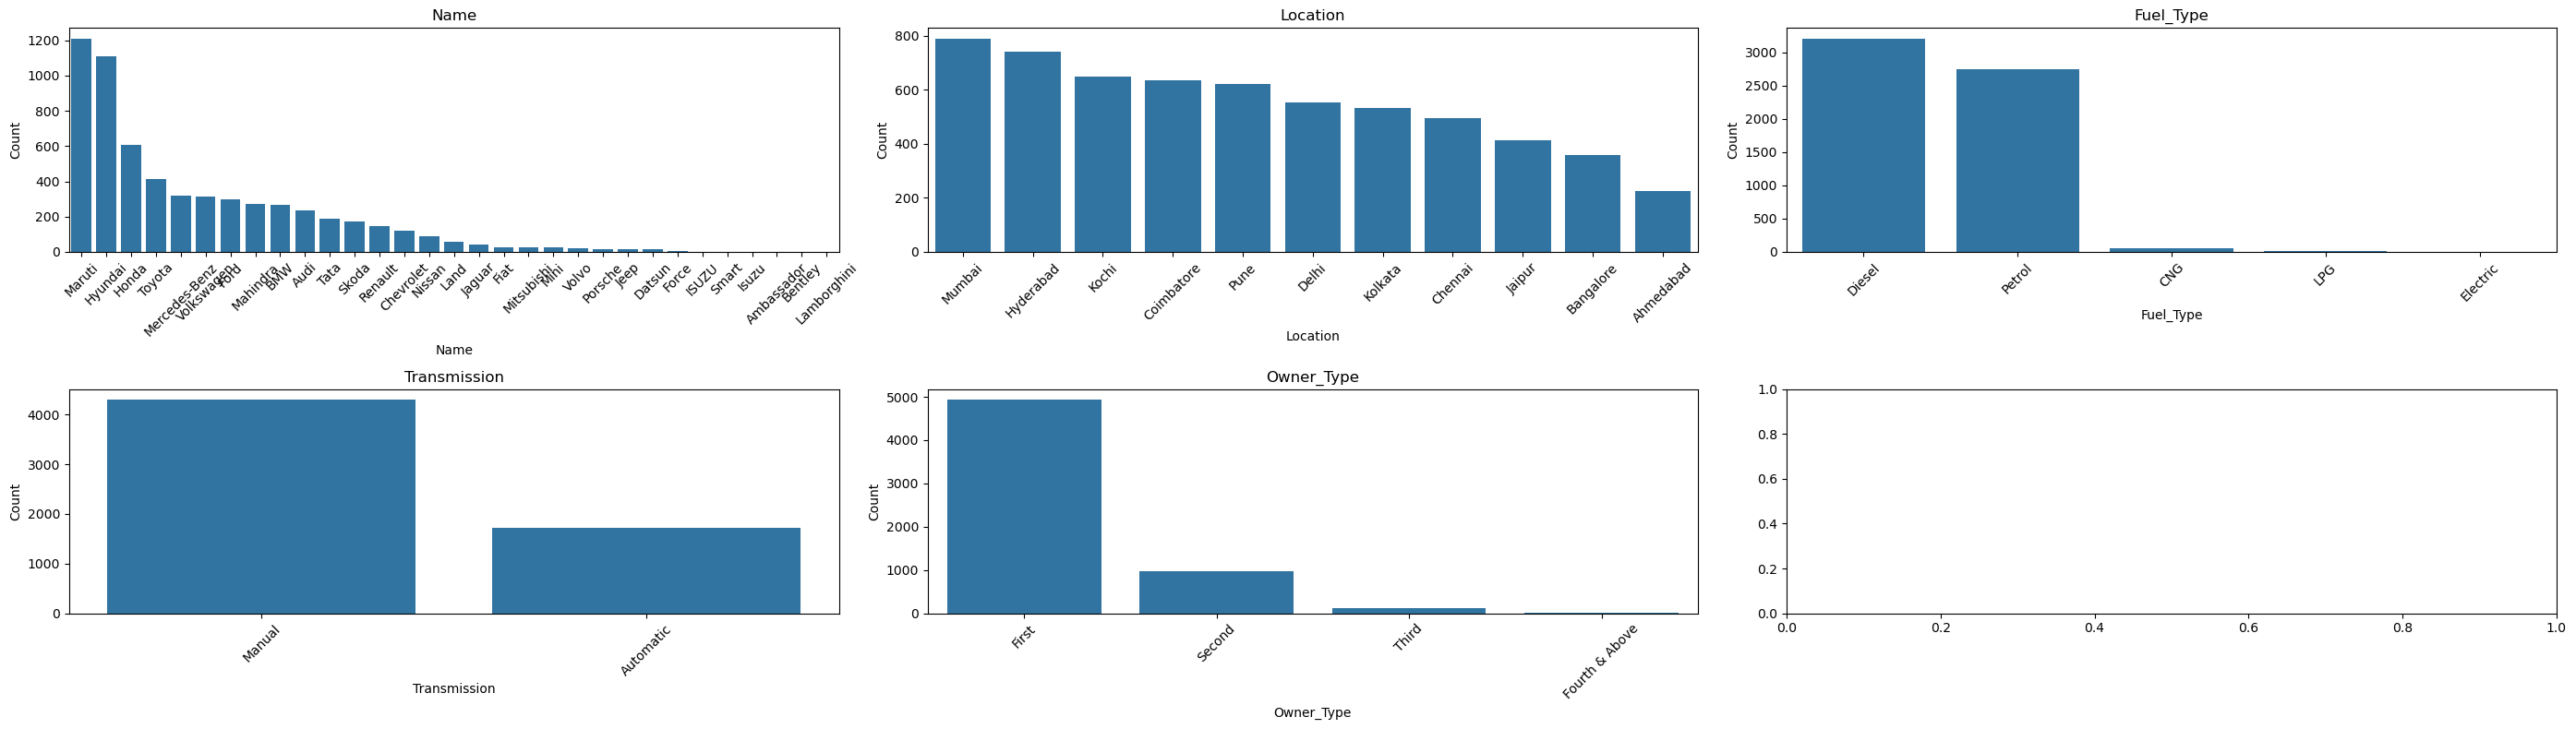

In [36]:

categorical_data = ['Name','Location','Fuel_Type','Transmission','Owner_Type']

# Use plt.subplots, not sns.subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(28, 8))
axes = axes.flatten()

for i, column in enumerate(categorical_data):
    sns.countplot(x=column, data=df_dirty, ax=axes[i], order=df_dirty[column].value_counts().index)
    axes[i].set_title(column)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  # rotate x labels for readability

plt.tight_layout()
plt.show()

    
    

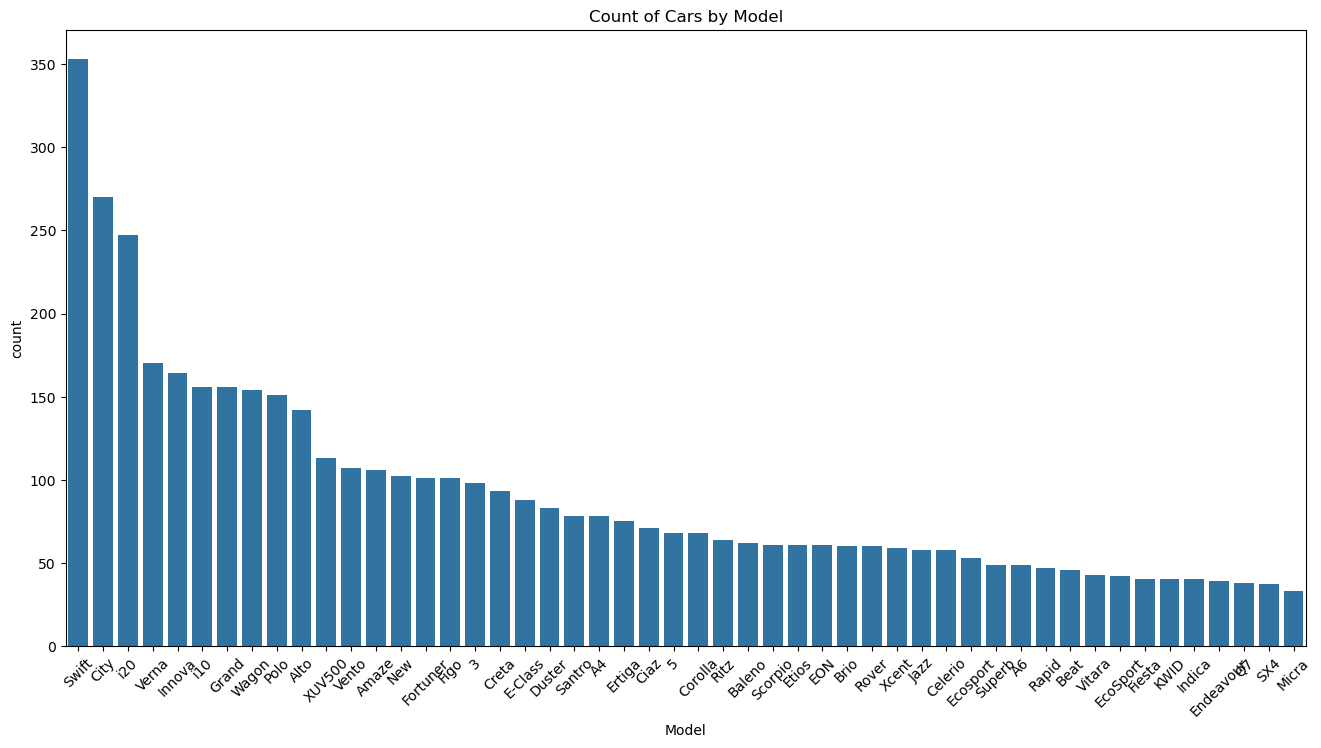

In [37]:

plt.figure(figsize=(16, 8))
top_50_models = df_dirty['Model'].value_counts().head(50).index
sns.countplot(x="Model", data=df_dirty[df_dirty['Model'].isin(top_50_models)], order=top_50_models)
plt.xticks(rotation=45)  
plt.title("Count of Cars by Model")
plt.show()

#### Insights:
#####


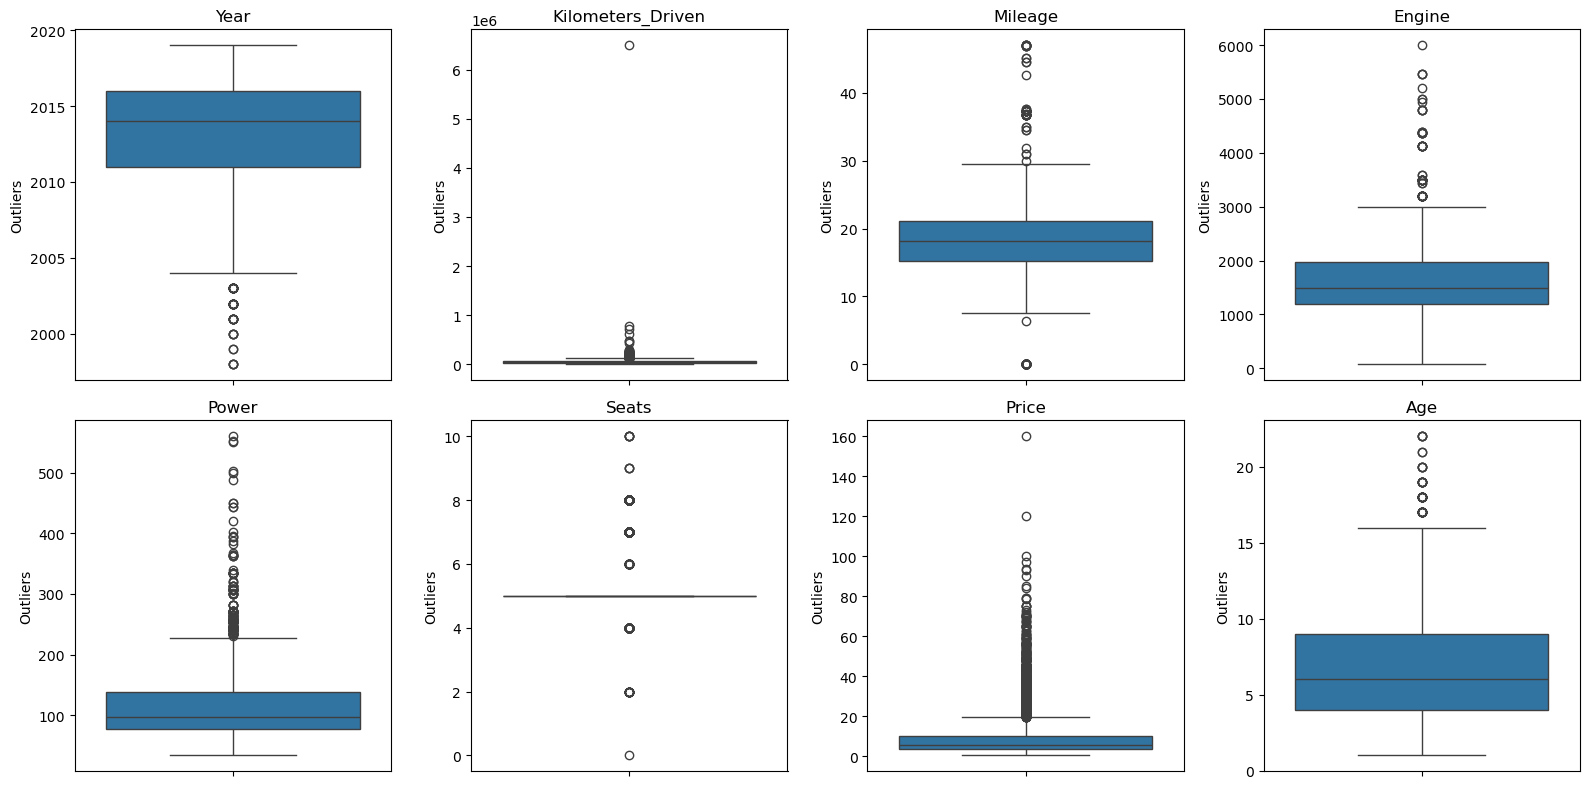

In [38]:
numerical_data = ["Year", "Kilometers_Driven", "Mileage", "Engine", 
                  "Power", "Seats", "Price", "Age"]

# Create subplots: 2 rows, 4 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten() 

# Plot each feature
for i, column in enumerate(numerical_data):
    sns.boxplot(y=df_dirty[column], ax=axes[i])
    axes[i].set_title(column, fontsize=12)
    
    axes[i].set_ylabel("Outliers")

plt.tight_layout()
plt.show()

In [39]:
df_dirty.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Model                0
Age                  0
dtype: int64

#### Handling Outliers

In [40]:
df_dirty.Seats.value_counts()

Seats
5.0     5054
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: count, dtype: int64

In [41]:
df_dirty.drop(index=df_dirty[df_dirty['Seats'] == 0].index, inplace=True)


In [42]:
df_dirty.drop(index=df_dirty[df_dirty['Kilometers_Driven'] ==df_dirty['Kilometers_Driven'].max() ].index, inplace=True)

In [43]:
def handle_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return x.clip(lower, upper)   # cap values instead of removing them

    
    

In [44]:
df_dirty.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Model                0
Age                  0
dtype: int64

In [45]:
for i in ["Year", "Kilometers_Driven", "Mileage", "Engine", 
                  "Power", "Age"]:
    df_dirty[i]=handle_outlier(df_dirty[i])
          


features after handling outliers 


IndexError: index 6 is out of bounds for axis 0 with size 6

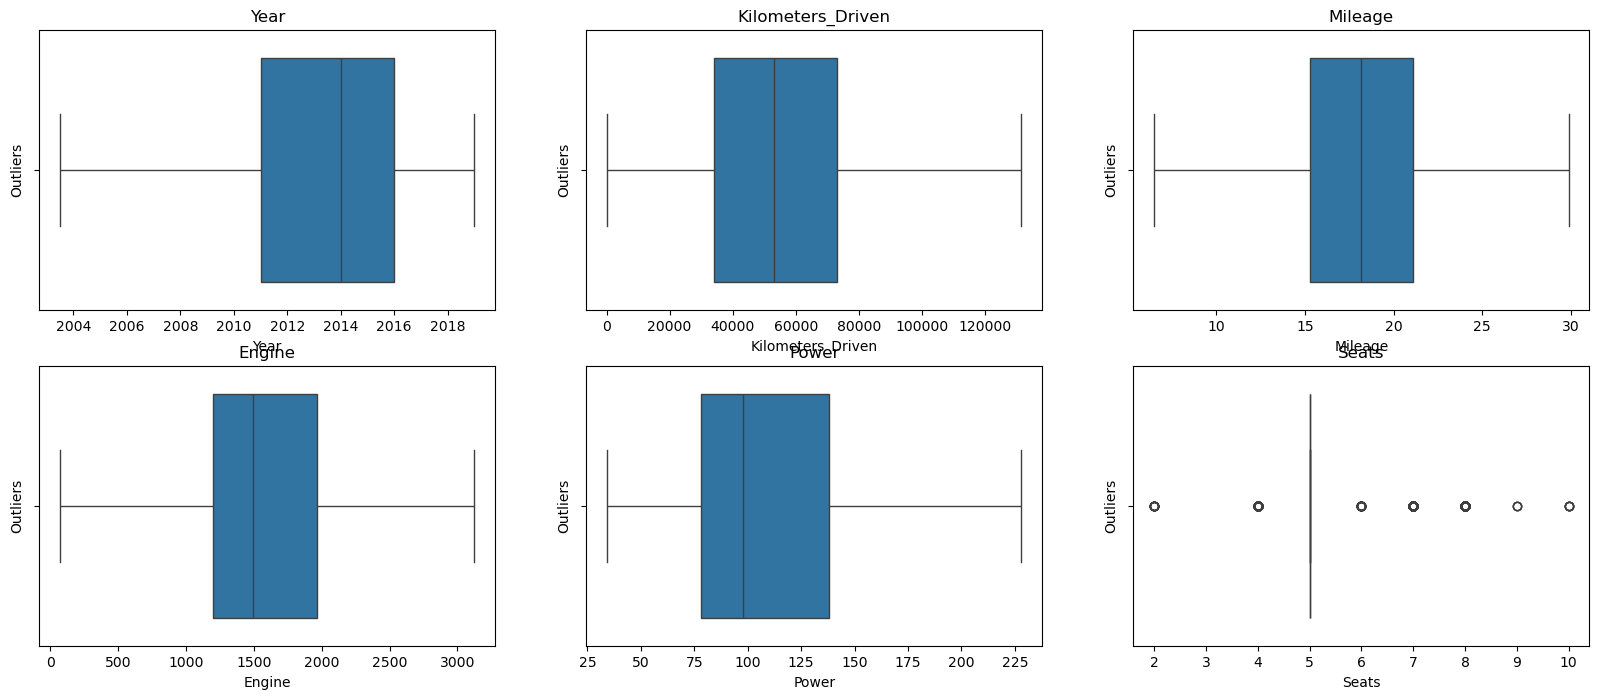

In [46]:
numerical_data = ["Year", "Kilometers_Driven", "Mileage", "Engine", 
                  "Power", "Seats","Age"]

# Create subplots: 2 rows, 4 columns
print("features after handling outliers ")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))
axes = axes.flatten() 

# Plot each feature
for i, column in enumerate(numerical_data):
    sns.boxplot(x=df_dirty[column], ax=axes[i])
    axes[i].set_title(column, fontsize=12)
    
    axes[i].set_ylabel("Outliers")

plt.tight_layout()
plt.show()

## BIvariate Data Analysis

In [47]:
df_dirty['Seats']

0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
       ... 
6014    5.0
6015    5.0
6016    8.0
6017    5.0
6018    5.0
Name: Seats, Length: 6015, dtype: float64

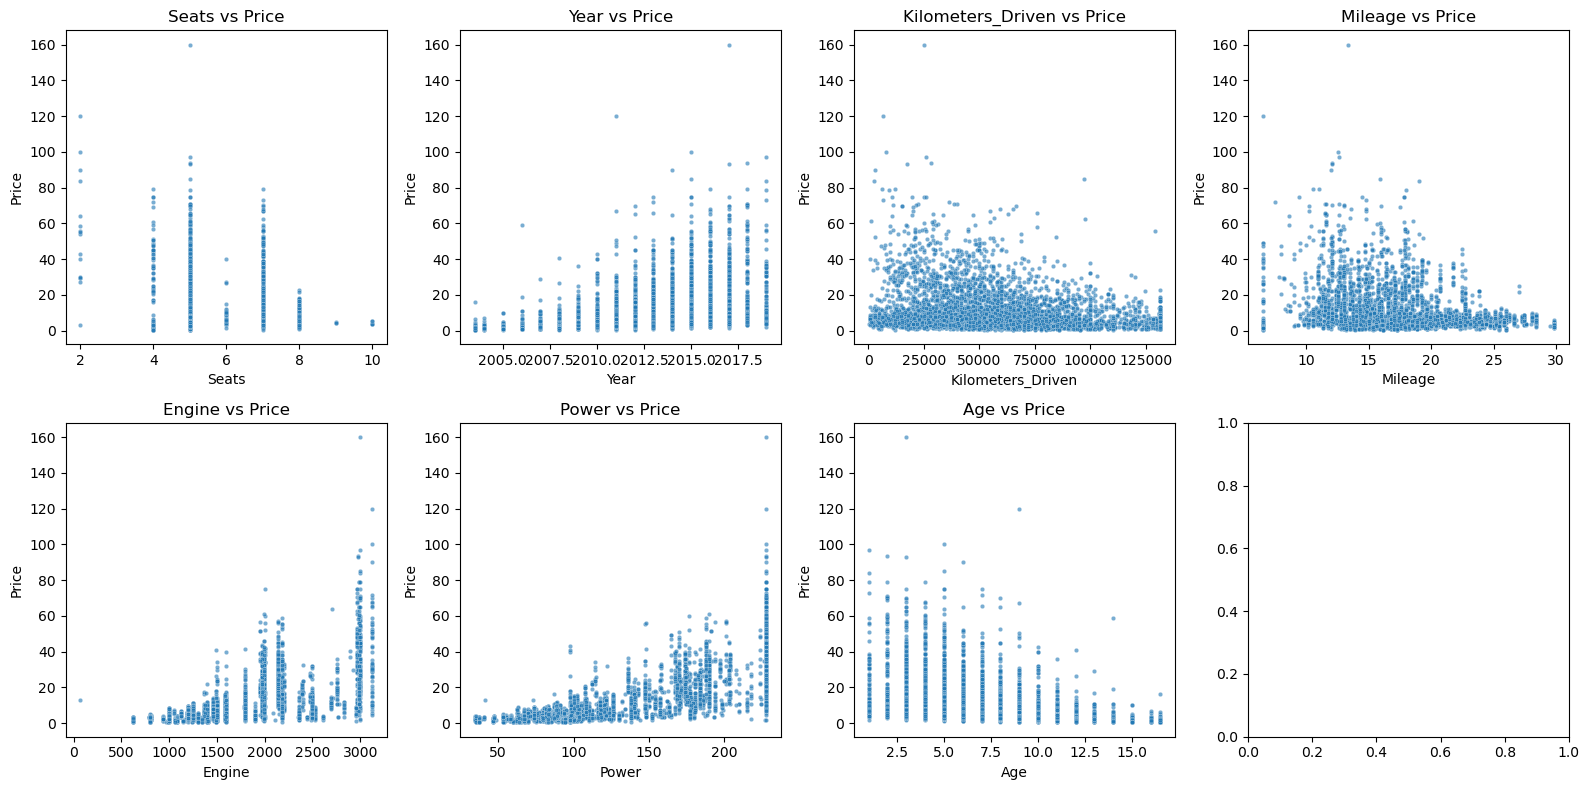

In [48]:
numerical_data = ["Seats","Year", "Kilometers_Driven", "Mileage", "Engine", 
                  "Power", "Age"] 


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten() 
for i, column in enumerate(numerical_data):
    sns.scatterplot(x=df_dirty[column], y=df_dirty["Price"], ax=axes[i], s=10, alpha=0.6)
    axes[i].set_title(f"{column} vs Price", fontsize=12)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Price")
    
 

plt.tight_layout()
plt.show()

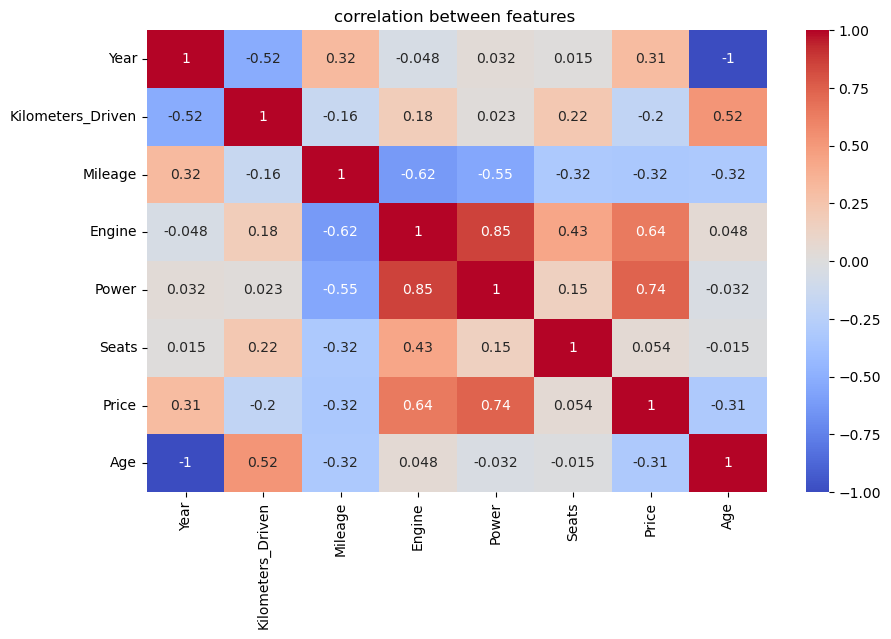

In [49]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_dirty.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')
plt.title("correlation between features ")
plt.show()

## Exploratory Data Analysis

In [50]:
df_dirty.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model,Age
0,Maruti,Mumbai,2010.0,72000,CNG,Manual,First,29.86,998.0,58.16,5.0,1.75,Wagon,10.0
1,Hyundai,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Creta,5.0
2,Honda,Chennai,2011.0,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Jazz,9.0
3,Maruti,Chennai,2012.0,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Ertiga,8.0
4,Audi,Coimbatore,2013.0,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,A4,7.0


In [51]:
df_dirty.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Model                0
Age                  0
dtype: int64

In [52]:
## saving clean data 
df_dirty.to_csv("cleaned_data.csv", index=False)


In [53]:
df=pd.read_csv(r"cleaned_data.csv")

In [54]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Model                0
Age                  0
dtype: int64

## Data Spliting

In [55]:
num_cols=df.select_dtypes('number').columns
cat_cols=df.select_dtypes('object').columns
print(num_cols)
print(cat_cols)

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Age'],
      dtype='object')
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Model'], dtype='object')


In [56]:
nominal_cols=['Location', 'Fuel_Type', 'Transmission','Location']
ordinal_cols=['Seats', 'Owner_Type']
num_cols=[ 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Age']

In [57]:
x=df.drop('Price',axis=1)
y=np.log(df['Price'])

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [59]:
x_train.shape,x_test.shape

((4812, 13), (1203, 13))

## Data Preprocessing

In [60]:
!pip install category_encoders



In [61]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Numeric pipeline
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ordinal_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

# Nominal pipeline
nominal_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Binary encoding pipeline (for "Model")
binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', ce.BinaryEncoder())
])


In [62]:
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipline, num_cols),
    ('ordinal_pipeline', ordinal_pipline, ordinal_cols),
    ('nominal_pipeline', nominal_pipline, nominal_cols),
    ('binary_pipeline', binary_pipeline, ['Model'])
])


In [63]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Model                0
Age                  0
dtype: int64

In [64]:
X_train_prep=preprocessor.fit_transform(x_train)
x_test_prep=preprocessor.transform(x_test)

In [65]:
X_train_prep,x_test_prep

(array([[ 2.32167525,  0.14182752, -1.0773738 , ...,  0.        ,
          0.        ,  1.        ],
        [ 1.78472013, -0.31578215, -0.19945958, ...,  0.        ,
          1.        ,  0.        ],
        [ 2.44963836,  0.18530044, -0.37715364, ...,  0.        ,
          1.        ,  1.        ],
        ...,
        [ 0.25516992,  1.07992735, -0.19770024, ...,  0.        ,
          1.        ,  1.        ],
        [-1.52762175,  0.71383961, -0.72726372, ...,  1.        ,
          0.        ,  0.        ],
        [ 1.41556349, -1.25388198,  1.55460951, ...,  0.        ,
          1.        ,  0.        ]]),
 array([[ 2.53981326, -0.27002118, -0.37715364, ...,  0.        ,
          1.        ,  1.        ],
        [ 0.20741447,  1.07992735, -0.37715364, ...,  0.        ,
          0.        ,  0.        ],
        [ 2.48900389,  0.39351284, -0.3718756 , ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [-0.26242125,  0.47588258, -0.72726372, ...,  

In [66]:

X_train_prep = pd.DataFrame(
    preprocessor.fit_transform(x_train),
    columns=preprocessor.get_feature_names_out(),
    index=x_train.index
)

X_test_prep = pd.DataFrame(
    preprocessor.transform(x_test),
    columns=preprocessor.get_feature_names_out(),
    index=x_test.index
)


In [67]:
X_train_prep

,num_pipeline__Kilometers_Driven,num_pipeline__Mileage,num_pipeline__Engine,num_pipeline__Power,num_pipeline__Seats,num_pipeline__Age,ordinal_pipeline__Seats,ordinal_pipeline__Owner_Type,nominal_pipeline__Location_Bangalore,nominal_pipeline__Location_Chennai,...,nominal_pipeline__Location_Mumbai,nominal_pipeline__Location_Pune,binary_pipeline__0_0,binary_pipeline__0_1,binary_pipeline__0_2,binary_pipeline__0_3,binary_pipeline__0_4,binary_pipeline__0_5,binary_pipeline__0_6,binary_pipeline__0_7
5639,2.321675,0.141828,-1.077374,-0.948860,-0.342423,3.090938,2.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2303,1.784720,-0.315782,-0.199460,-0.233433,-0.342423,2.309836,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2617,2.449638,0.185300,-0.377154,-0.907543,-0.342423,1.684954,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1397,-0.676581,-0.528571,2.432524,2.551621,2.156046,-0.814573,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3703,-0.889618,-0.086977,0.937079,1.288752,-0.342423,-1.751896,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-1.518393,0.750448,-0.261037,-0.162760,-0.342423,-1.439455,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
5191,1.482683,-1.894536,1.558128,1.021282,-0.342423,0.435190,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
5226,0.255170,1.079927,-0.197700,-0.256048,-0.342423,-1.127014,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
5390,-1.527622,0.713840,-0.727264,-0.600932,-0.342423,-1.127014,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# Model Building

In [68]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_prep,y_train)

LinearRegression()

In [69]:
model.intercept_

np.float64(0.7404697263611719)

In [70]:
model.coef_

array([-0.07452909, -0.041777  ,  0.13522394,  0.41878387, -0.50861155,
       -0.36095725,  0.62560771, -0.03305088,  0.05993438, -0.00558851,
        0.03260323, -0.04531581,  0.05061001, -0.04255875, -0.03199651,
       -0.13908201, -0.04237655, -0.04500125,  0.08937595,  1.10535192,
       -0.01503659, -0.1767714 , -0.23171093,  0.05993438, -0.00558851,
        0.03260323, -0.04531581,  0.05061001, -0.04255875, -0.03199651,
       -0.13908201, -0.04237655, -0.04500125,  0.04796983,  0.00240378,
       -0.05215255, -0.01208251, -0.05507163, -0.01843977, -0.00339346,
       -0.07203425])

In [71]:
## error evaluation
from sklearn.metrics import r2_score,mean_squared_error
y_pred=model.predict(x_test_prep)
print("r2_score",r2_score(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))

r2_score 0.8976617212278074
mean_squared_error 0.07935164548006506


In [72]:
## trying other models
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(X_train_prep,y_train)
y_pred=model.predict(x_test_prep)
print("r2_score",r2_score(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))


r2_score 0.8975686213297923
mean_squared_error 0.07942383381653266


In [73]:
## apply polynomial feature
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Numeric pipeline
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('poly',PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler())
])

ordinal_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

# Nominal pipeline
nominal_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Binary encoding pipeline (for "Model")
binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', ce.BinaryEncoder())
])



In [74]:
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipline, num_cols),
    ('ordinal_pipeline', ordinal_pipline, ordinal_cols),
    ('nominal_pipeline', nominal_pipline, nominal_cols),
    ('binary_pipeline', binary_pipeline, ['Model'])
])

In [75]:
X_train_prep=preprocessor.fit_transform(x_train)
x_test_prep=preprocessor.transform(x_test)

In [76]:
model=LinearRegression()
model.fit(X_train_prep,y_train)

LinearRegression()

In [77]:
y_pred=model.predict(x_test_prep)

In [78]:
print("r2_score",r2_score(y_test,y_pred))
print("train score",model.score(X_train_prep,y_train))
print("mean_squared_error",mean_squared_error(y_test,y_pred))

r2_score 0.9098939010821645
train score 0.9139716046976208
mean_squared_error 0.0698669872378445


# Model Selection 

In [79]:
x=df.drop(['Price'],axis=1)
y=np.log(df['Price'])
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=24)
X_train,x_val,y_train,y_val=train_test_split(X_train,y_train,test_size=.2,random_state=24)
X_train_prep=preprocessor.fit_transform(X_train)
X_test_prep=preprocessor.transform(x_test)
X_val_prep=preprocessor.transform(x_val)



In [80]:
from sklearn.linear_model import Lasso

In [81]:
m1=LinearRegression()
m2=Ridge()
m3=Lasso()
val_scores={}
for model in[m1,m2,m3]:
    model.fit(X_train_prep,y_train)
    val_score=model.score(X_val_prep,y_val)
    val_scores[model]=val_score
    

In [82]:
val_scores

{LinearRegression(): 0.9167660360005596,
 Ridge(): 0.9174550216744236,
 Lasso(): -0.00017388307930588098}

In [83]:
## cross validation

In [84]:
from sklearn.model_selection import cross_val_score
val_scores={}
for model in [m1,m2,m3]:
    val_score=cross_val_score(model,X_train_prep,y_train,cv=5,scoring='r2')
    val_scores[model]=val_score.mean()
    

In [85]:
val_scores

{LinearRegression(): np.float64(0.8988294574373766),
 Ridge(): np.float64(0.9010380299158551),
 Lasso(): np.float64(-0.000713362333380374)}

In [86]:
## hyper paramter tunning
from sklearn.model_selection import GridSearchCV
ridge=Pipeline([('preprocessor',preprocessor),('ridge',Ridge())])
params={'preprocessor__num_pipeline__poly__degree':[2,3,4,6],'ridge__alpha':[.1,.01,.001]}
grid=GridSearchCV(ridge,params,cv=5,scoring='r2')
grid.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(degree=3)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Kilometers_Driven',
                                                                          'Mileage',
                                                                          'Engine',
                                                                          'Power',
                                                                          'Seats',
                                                                          'Age']),
                                                                        ('ordinal_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          Si...
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['Location',
                                                                          'Fuel_Type',
                                                                          'Transmission',
                                                                          'Location']),
                                                                        ('binary_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          BinaryEncoder())]),
                                                                         ['Model'])])),
                                       ('ridge', Ridge())]),
             param_grid={'preprocessor__num_pipeline__poly__degree': [2, 3, 4,
                                                                      6],
                         'ridge__alpha': [0.1, 0.01, 0.001]},
             scoring='r2')

In [87]:
grid.best_params_

{'preprocessor__num_pipeline__poly__degree': 3, 'ridge__alpha': 0.1}

In [88]:
grid.best_score_

np.float64(0.90183927331082)

In [89]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num_pipeline__poly__degree,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.119150,0.015146,0.046647,0.008044,2,0.100,{'preprocessor__num_pipeline__poly__degree': 2...,0.901750,0.887184,0.890960,0.912555,0.906616,0.899813,0.009489,4
1,0.147687,0.055013,0.041765,0.002609,2,0.010,{'preprocessor__num_pipeline__poly__degree': 2...,0.901728,0.887246,0.890701,0.912496,0.906602,0.899755,0.009503,5
2,0.117573,0.008279,0.040696,0.000571,2,0.001,{'preprocessor__num_pipeline__poly__degree': 2...,0.901725,0.887250,0.890671,0.912490,0.906601,0.899747,0.009506,6
3,0.136888,0.003086,0.042563,0.000152,3,0.100,{'preprocessor__num_pipeline__poly__degree': 3...,0.901168,0.888946,0.894947,0.918346,0.905789,0.901839,0.010023,1
4,0.143177,0.010946,0.044141,0.003024,3,0.010,{'preprocessor__num_pipeline__poly__degree': 3...,0.900734,0.889671,0.890292,0.917470,0.905335,0.900700,0.010322,2
5,0.137440,0.004157,0.043167,0.000579,3,0.001,{'preprocessor__num_pipeline__poly__degree': 3...,0.899844,0.889799,0.890246,0.915585,0.904282,0.899951,0.009596,3
6,0.184710,0.003807,0.051153,0.002581,4,0.100,{'preprocessor__num_pipeline__poly__degree': 4...,0.901013,0.893626,0.898154,0.913878,0.875814,0.896497,0.012339,8
7,0.190796,0.014351,0.053275,0.003899,4,0.010,{'preprocessor__num_pipeline__poly__degree': 4...,0.901319,0.893471,0.900033,0.909878,0.846926,0.890325,0.022320,10
8,0.228696,0.040167,0.053331,0.002898,4,0.001,{'preprocessor__num_pipeline__poly__degree': 4...,0.905052,0.887726,0.898906,0.906393,0.872753,0.894166,0.012574,9
9,0.667753,0.075953,0.079315,0.001707,6,0.100,{'preprocessor__num_pipeline__poly__degree': 6...,0.901498,0.895093,0.893353,0.915006,0.887507,0.898491,0.009385,7


## Best Model

In [94]:
best_model=grid.best_estimator_
y_pred=best_model.predict(x_test)
print("r2 score",r2_score(y_pred,y_test))


r2 score 0.9037962801982657


### SAVING MODEL

In [96]:
import pickle
pickle.dump(best_model,open("model.pkl","wb"))

### Testing the model

In [97]:
model=pickle.load(open("model.pkl","rb"))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Kilometers_Driven',
                                                   'Mileage', 'Engine', 'Power',
                                                   'Seats', 'Age']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_f...
                                                  ['Seats', 'Owner_Type']),
                                                 ('nominal_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Location', 'Fuel_Type',
                                                   'Transmission',
                                                   'Location']),
                                                 ('binary_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   BinaryEncoder())]),
                                                  ['Model'])])),
                ('ridge', Ridge(alpha=0.1))])

In [101]:
x_value=x_test_prep[:1]

In [102]:
y_pred=model.predict(x_value)

In [103]:
y_pred

array([1.84201424])